In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("salaries.csv")

In [3]:
df.shape

(16, 4)

In [4]:
df

,Company,Job,Degree,Salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
#check null values
df.isnull().sum()

Company                  0
Job                      0
Degree                   0
Salary_more_then_100k    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
Company                  16 non-null object
Job                      16 non-null object
Degree                   16 non-null object
Salary_more_then_100k    16 non-null int64
dtypes: int64(1), object(3)
memory usage: 592.0+ bytes


In [7]:
#Separate object type data from df dataset
df_cat=df.select_dtypes(object)

In [8]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
Company    16 non-null object
Job        16 non-null object
Degree     16 non-null object
dtypes: object(3)
memory usage: 464.0+ bytes


In [9]:
#change object type data to numerical type
from sklearn.preprocessing import LabelEncoder

In [11]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [13]:
df_cat

,Company,Job,Degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
Company                  16 non-null object
Job                      16 non-null object
Degree                   16 non-null object
Salary_more_then_100k    16 non-null int64
dtypes: int64(1), object(3)
memory usage: 592.0+ bytes


In [17]:
#Separate the Target and separate the Predictor
X=df_cat.iloc[:,:]  #[rowstart:rowstop,colstart:colstop]
Y=df.iloc[:,-1]

In [18]:
X.head()

,Company,Job,Degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [19]:
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary_more_then_100k, dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
#Create a function 
def create_model(model):  #passing argument and return value
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    return model

In [27]:
#decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [25]:
#create a object of DecisionTree
dt1=DecisionTreeClassifier()
#dt1 is a user defined object of DecisionTreeClassifier

In [28]:
#call function create_model()
dt1=create_model(dt1) #return the object

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [30]:
dt1.feature_importances_

array([0.50892857, 0.19642857, 0.29464286])

In [36]:
features=df_cat.columns
features

Index(['Company', 'Job', 'Degree'], dtype='object')

In [33]:
from sklearn import tree

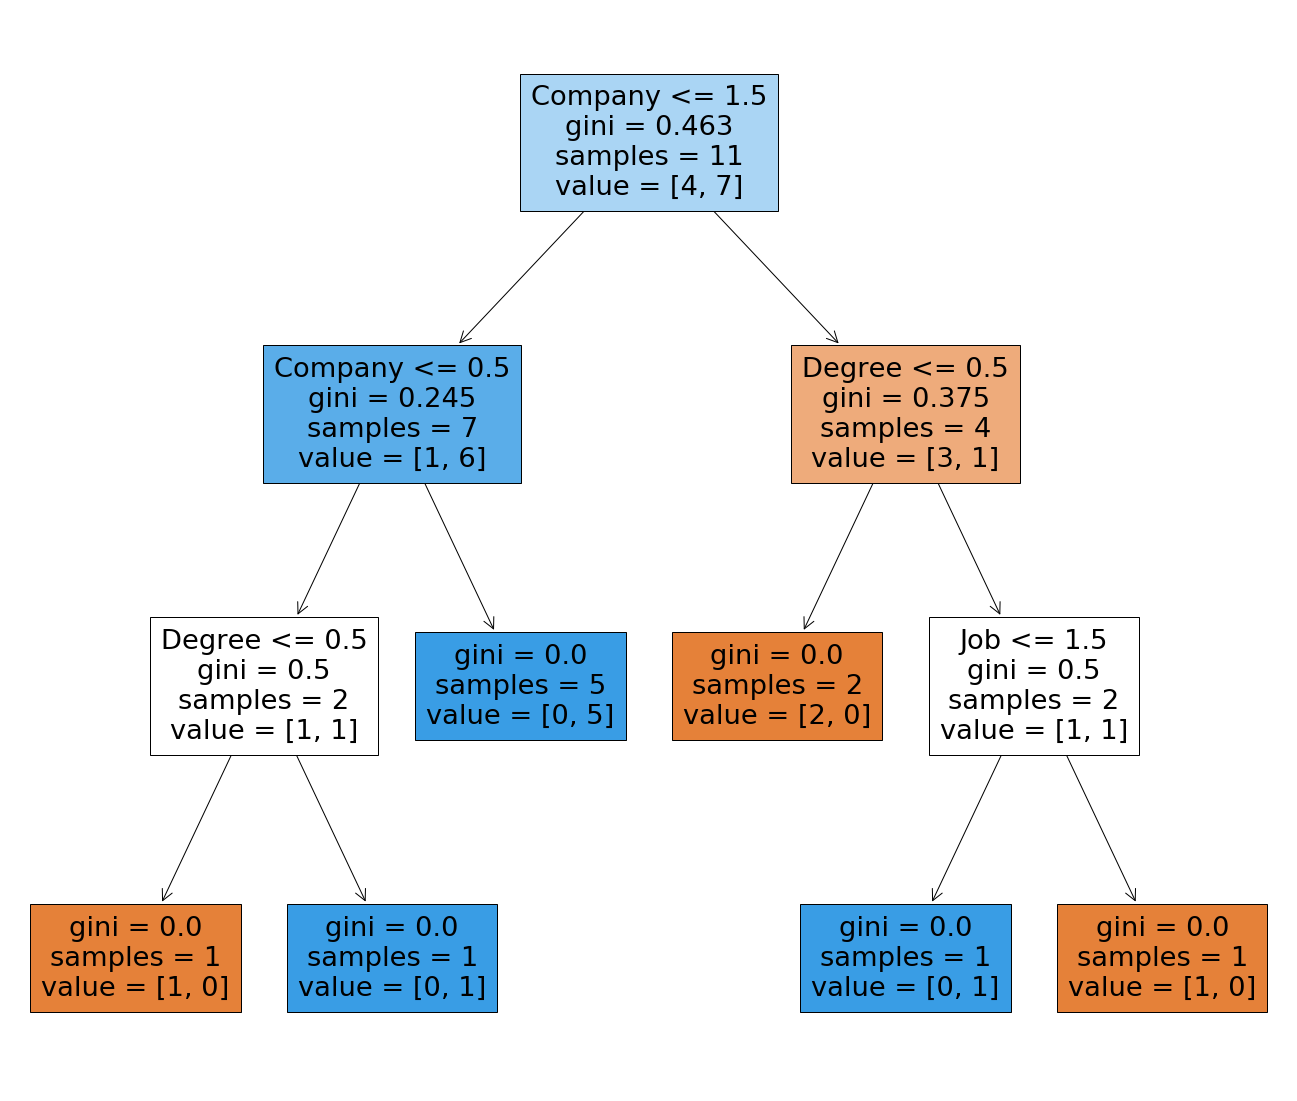

In [35]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [37]:
text_representation = tree.export_text(dt1) #dt1 passing and this is object
#of DecisionTreeClassifier
print(text_representation)

|--- feature_0 <= 1.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_0 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.50
|   |   |   |--- class: 0

